# Distribution of Patch Count & Invalid Pixels Check

## Katy Koenig
### July 2019

In [138]:
%matplotlib inline
import pandas as pd
import plotnine as p9
import matplotlib.pyplot as plt
from sklearn import preprocessing

Read in csv and group by MOD02 files

In [95]:
df = pd.read_csv('best.csv')
grouped = df.groupby('filename') \
            .agg({'patch_no': 'count', 'inval_pixels':'sum'}).reset_index() \
            .rename(columns={'inval_pixels': 'sum_invalid_pixels', 'patch_no': 'patch_count'})

In [96]:
grouped.head()

,filename,patch_count,sum_invalid_pixels
0,MOD021KM.A2000260.0000.061.2017175004738.hdf,120,1018
1,MOD021KM.A2000260.0005.061.2017175004931.hdf,76,15
2,MOD021KM.A2000260.0010.061.2017175004603.hdf,78,391
3,MOD021KM.A2000260.0015.061.2017175004552.hdf,137,247
4,MOD021KM.A2000260.0020.061.2017175004526.hdf,19,3293


## Quick Summary Stats

In [97]:
grouped.describe()

,patch_count,sum_invalid_pixels
count,1958.000000,1958.000000
mean,101.886619,20586.405516
std,37.589524,56823.434279
min,1.000000,0.000000
25%,78.000000,0.000000
50%,110.000000,16.000000
75%,134.000000,2276.250000
max,150.000000,248939.000000


Correlation Quick Check

In [98]:
grouped.corr()

,patch_count,sum_invalid_pixels
patch_count,1.000000,0.143589
sum_invalid_pixels,0.143589,1.000000


Percentage with No Invalid Pixels

In [28]:
# Percentage that have no invalid pixels
pnt_no_invals = grouped[grouped['sum_invalid_pixels'] == 0]['filename'].count()/grouped['filename'].count()*100
print('Percentage of Images with No Invalid Pixels: {:.2f}%'.format(pnt_no_invals))

Percentage of Images with No Invalid Pixels: 30.64%


## Distribution Plots

In [147]:
def create_scatter(df, col1='sum_invalid_pixels', col2='patch_count'):
    '''
    Creates a scatterplot of distribution
    
    Inputs:
        df: a pandas dataframe
        col1(str): a column in the pandas dataframe
        col2(str): another column in the pandas dataframe

    Outputs: plotnine (ggplot) scatterplot
    '''
    p = p9.ggplot(data=df, mapping=p9.aes(x=col1, y=col2)) \
                  + p9.geom_point(alpha=0.3, color='blue') + p9.theme_minimal() \
                  + p9.ggtitle('Distribution of the No. of Invalid Pixels by No. Patches for Each Image')
    return p

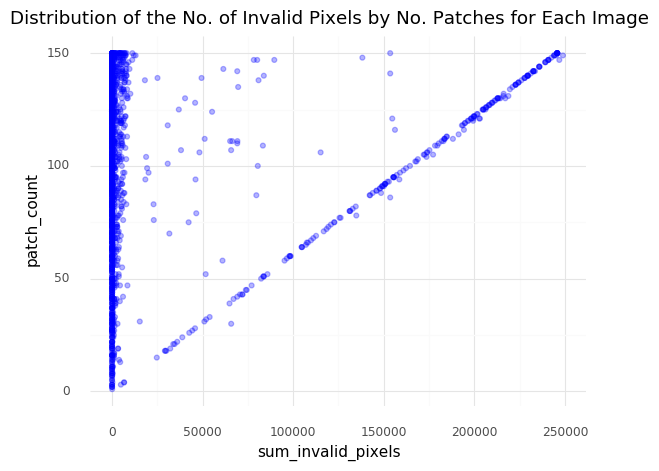

<ggplot: (303039222)>

In [146]:
create_scatter(grouped)

This is good! 1.) Many full images have no invalid pixels. 2.) B/c patches same size and assumption that invalid pixels randomly (and equally) distributed, the plot confirms that as patch count increases, the total number of invalid pixels increases for a given image (as expected)

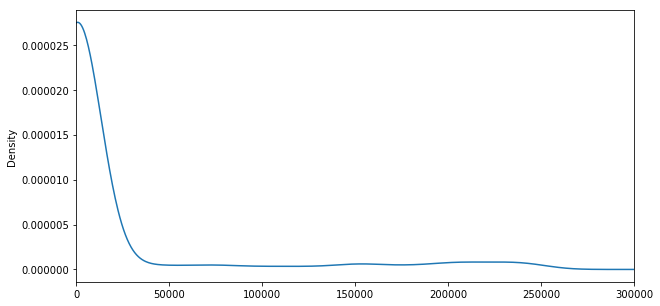

In [71]:
grouped['sum_invalid_pixels'].plot(kind='kde', xlim=(0, 300000), figsize=(10, 5))

To plot both no. invalid pixels & no. patches on same axis, we need to scale

In [148]:
def scale_and_plot_kde(df, col1='sum_invalid_pixels', col2='patch_count',
                       col3='scaled_total_invalid_pixels', col4='scaled_patch_ct'):
    '''
    Scales two columns of a dataframe to floats between 0 and 100 and plots a kernel
    density estimation of the scaled columns
    
    Inputs:
        df: a pandas dataframe
        col1(str): column in dataframe of numbers
        col2(str): column in dataframe of numbers
        col3(str): name for new scaled column of col1
        col4(str): name for new scaled column of col2
    
    Outputs: None (prints a kde)
    '''
    min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 100))
    df[col3] = min_max_scaler.fit_transform(df[[col1]])
    df[col4] = min_max_scaler.fit_transform(df[[col2]])
    df[[col3, col4]].plot(kind='kde', xlim=(0, 100), figsize=(20, 10))

/Users/katykoeing/miniconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/katykoeing/miniconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


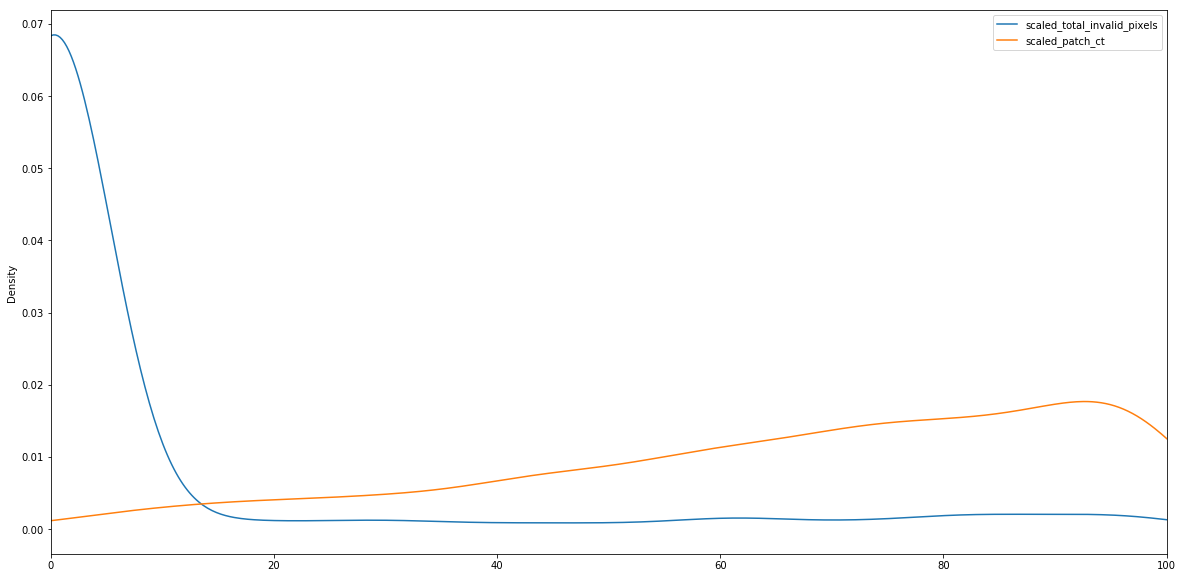

In [136]:
scale_and_plot_kde(grouped)

## Distribution by Date

Below, I use the slice from the filename that represents the year & how many days into the year the image was taken

In [80]:
by_date = grouped.groupby(grouped['filename'].str.slice(start=10, stop=17)) \
                 .agg({'patch_count': 'count', 'sum_invalid_pixels':'sum'}).reset_index()
by_date.head()

,filename,patch_count,sum_invalid_pixels
0,2000260,147,293752
1,2001015,123,216198
2,2001162,124,333803
3,2001196,90,355960
4,2001226,76,206055


### Again, quick summary stats

In [85]:
by_date.describe()

,patch_count,sum_invalid_pixels
count,29.000000,2.900000e+01
mean,67.517241,1.389937e+06
std,39.193313,4.722114e+06
min,4.000000,5.610000e+02
25%,41.000000,8.640000e+04
50%,73.000000,2.114910e+05
75%,85.000000,3.132820e+05
max,151.000000,2.491419e+07


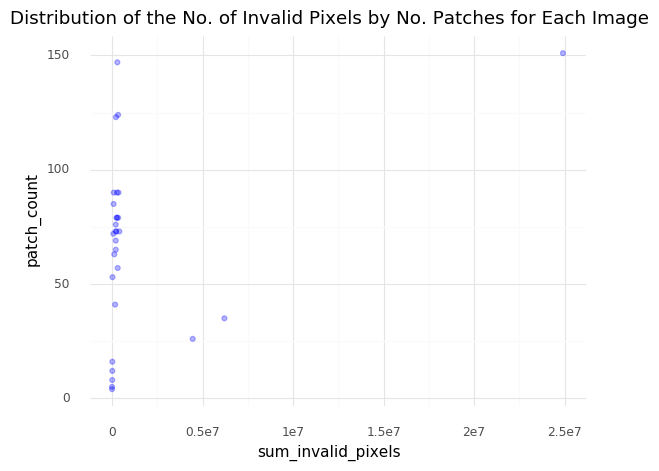

<ggplot: (301267597)>

In [112]:
create_scatter(by_date)

/Users/katykoeing/miniconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/katykoeing/miniconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


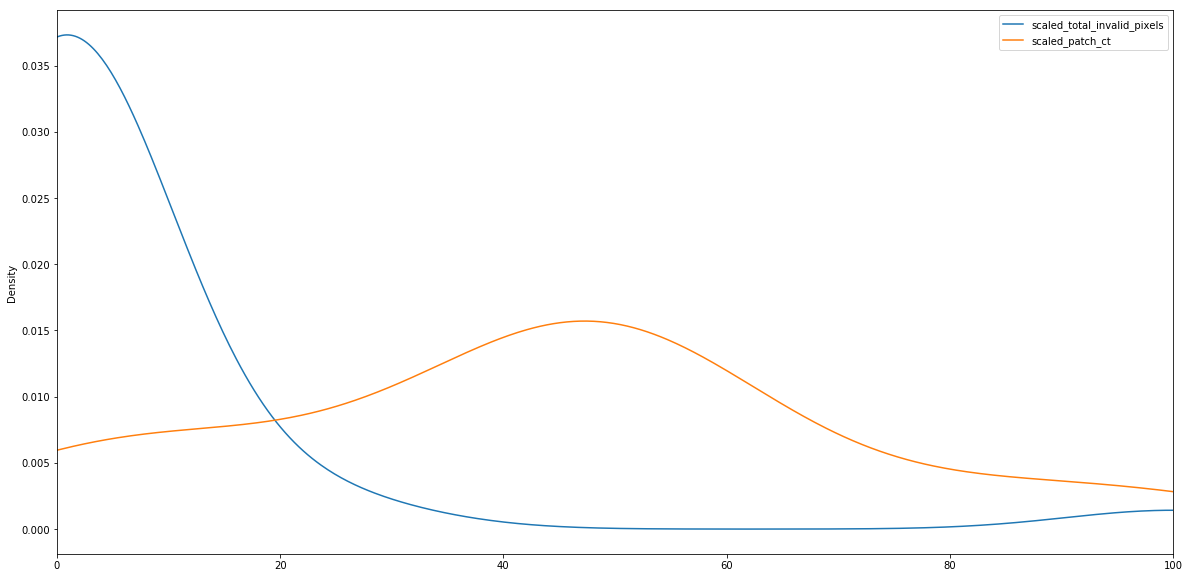

In [137]:
scale_and_plot_kde(by_date)